In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

In [33]:
# load data from data/tracks.csv
tracks = pd.read_csv('data/tracks.csv')
tracks.head()

C:\Users\sevcn\AppData\Local\Temp\ipykernel_6124\363931543.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  tracks = pd.read_csv('data/tracks.csv')


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0.0,-13.338,1.0,0.4510,0.674,0.7440,0.151,0.127,104.851,3.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0.0,-22.136,1.0,0.9570,0.797,0.0000,0.148,0.655,102.009,1.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1.0,-21.180,1.0,0.0512,0.994,0.0218,0.212,0.457,130.418,5.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7.0,-27.961,1.0,0.0504,0.995,0.9180,0.104,0.397,169.980,3.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3.0,-16.900,0.0,0.0390,0.989,0.1300,0.311,0.196,103.220,4.0


In [34]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  object 
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  float64
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  float64
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [35]:
tracks.shape

(586672, 20)

In [36]:
tracks.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       1
dtype: int64

In [37]:
# show the distribution of length of string in release_date
tracks['release_date'].apply(len).value_counts()


release_date
10    448080
4     136489
7       2102
5          1
Name: count, dtype: int64

In [38]:
tracks.dropna(inplace=True)

In [39]:
tracks.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586600.000000,5.866000e+05,586600.000000,586600.000000,586600.000000,586600.000000,586600.000000,586600.000000,586600.000000,586600.000000,586600.000000,586600.000000,586600.000000,586600.000000
mean,27.573173,2.300548e+05,0.563612,0.542071,5.221596,-10.205784,0.658798,0.104870,0.449803,0.113425,0.213933,0.552306,118.467907,3.873409
std,18.369407,1.265329e+05,0.166102,0.251911,3.519422,5.089425,0.474113,0.179903,0.348813,0.266843,0.184328,0.257673,29.762962,0.473112
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750830e+05,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.606000,4.000000
50%,27.000000,2.149070e+05,0.577000,0.549000,5.000000,-9.242000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.387000,4.000000
75%,41.000000,2.638670e+05,0.686000,0.748000,8.000000,-6.481000,1.000000,0.076300,0.784000,0.009550,0.278000,0.769000,136.324000,4.000000
max,100.000000,5.621218e+06,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [40]:
tracks['release_year'] = tracks['release_date'].apply(lambda x: int(x[:4]))
print(tracks['release_year'].min())
print(tracks['release_year'].max())
tracks.head()

1900
2021


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,-13.338,1.0,0.4510,0.674,0.7440,0.151,0.127,104.851,3.0,1922
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,-22.136,1.0,0.9570,0.797,0.0000,0.148,0.655,102.009,1.0,1922
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,-21.180,1.0,0.0512,0.994,0.0218,0.212,0.457,130.418,5.0,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,-27.961,1.0,0.0504,0.995,0.9180,0.104,0.397,169.980,3.0,1922
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,-16.900,0.0,0.0390,0.989,0.1300,0.311,0.196,103.220,4.0,1922


In [41]:
#  remove songs that were not released between 1930 and 2019
tracks = tracks[tracks['release_year'] >= 1930]
tracks = tracks[tracks['release_year'] < 2020]

# remove songs that lasted less than 10 seconds or more than 600 seconds
tracks['duration_ms'] = tracks['duration_ms'] / 1000
tracks = tracks[tracks['duration_ms'] >= 10]
tracks = tracks[tracks['duration_ms'] <= 1000]
# tracks.rename(columns={'duration_ms': 'duration'}, inplace=True)

# the data has explicit values two types of 0 and two types of 1, so count gives me 4 values instead of 2. Fix it
print(tracks['explicit'].value_counts())
tracks['explicit'] = tracks['explicit'].apply(lambda x: 1 if (x == 1 or x == '1' or x == 1.0) else 0)
print(tracks['explicit'].value_counts())
# this does not work but is good enough as I just incorectly label 270 samples into the majority catagory


print(tracks.shape)

tracks.describe()

explicit
0    503649
0     32387
1     20868
1       272
Name: count, dtype: int64
explicit
0    536036
1     21140
Name: count, dtype: int64
(557176, 21)


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
count,557176.000000,557176.000000,557176.000000,557176.000000,557176.000000,557176.000000,557176.000000,557176.000000,557176.000000,557176.000000,557176.000000,557176.000000,557176.000000,557176.000000,557176.000000,557176.000000
mean,27.455553,227.587536,0.037941,0.559922,0.542784,5.222646,-10.222948,0.661531,0.101438,0.449533,0.109939,0.214752,0.554099,118.453761,3.872283,1988.304783
std,17.711150,92.236910,0.191055,0.165117,0.251932,3.515898,5.045423,0.473189,0.175508,0.347307,0.262525,0.185173,0.258203,29.732064,0.472374,21.376568
min,0.000000,10.371000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1930.000000
25%,13.000000,176.067000,0.000000,0.450000,0.345000,2.000000,-12.899000,0.000000,0.033700,0.097600,0.000000,0.098200,0.347000,95.598750,4.000000,1974.000000
50%,27.000000,216.600000,0.000000,0.573000,0.549000,5.000000,-9.306000,1.000000,0.043600,0.425000,0.000025,0.139000,0.566000,117.359500,4.000000,1992.000000
75%,40.000000,265.160000,0.000000,0.681000,0.750000,8.000000,-6.530000,1.000000,0.073300,0.781000,0.008750,0.279000,0.772000,136.277000,4.000000,2006.000000
max,94.000000,999.827000,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000,2019.000000


In [42]:
tracks['musical_era'] = pd.cut(tracks['release_year'], 
    bins=[1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019],
    labels=['30s', '40s', '50s', '60s', '70s', '80s', '90s', '00s', '10s'])

print(tracks['musical_era'].value_counts())
print(tracks['musical_era'].isnull().sum())
tracks.head()

musical_era
90s    108665
10s    105042
00s     86741
80s     82164
70s     61557
60s     47055
50s     35127
40s     17879
30s     12946
Name: count, dtype: int64
0


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,musical_era
5505,7CIoJE0JfVFcmmUY3fFojH,"Hungarian Rhapsody No. 2 in C-Sharp Minor, S. ...",48,541.600,0,"['Franz Liszt', 'Vladimir Horowitz']","['1385hLNbrnbCJGokfH2ac2', '4Ws5hSoABAwvGJ4LhH...",1930,0.349,0.32600,...,1.0,0.0551,0.987,0.886000,0.7840,0.1680,80.233,4.0,1930,30s
5506,1URyyv3KRVnqlVkQQi3OlQ,Chorra,38,124.147,0,['Carlos Gardel'],['05Q9xndTxhXhD5trpmTtfU'],1930-08-18,0.699,0.44700,...,1.0,0.1600,0.971,0.000236,0.1900,0.6030,124.463,3.0,1930,30s
5507,66QFC1l8Oe1bKSLdZYwr9B,"Consolation No. 3 in D-Flat Major, S. 172/3",37,264.560,0,"['Franz Liszt', 'Vladimir Horowitz']","['1385hLNbrnbCJGokfH2ac2', '4Ws5hSoABAwvGJ4LhH...",1930,0.269,0.00856,...,1.0,0.0367,0.991,0.913000,0.1320,0.0808,70.131,4.0,1930,30s
5508,5RXchQNEfOrsAtfklgYNnR,Fita Amarela,31,148.219,0,"['Francisco Alves', 'Mario Reis']","['7pjGFyFFzIThPQNEfLRdiP', '0zh59roqkP8QYcrXGP...",1930-06-14,0.700,0.59300,...,1.0,0.1810,0.983,0.000083,0.3790,0.7500,107.391,4.0,1930,30s
5509,1EwvP4mPzurPA5axgvUoM6,"Consolation No. 2 in E Major, S. 172/2",30,210.827,0,"['Franz Liszt', 'Vladimir Horowitz']","['1385hLNbrnbCJGokfH2ac2', '4Ws5hSoABAwvGJ4LhH...",1930,0.294,0.00684,...,1.0,0.0470,0.993,0.939000,0.0616,0.0550,49.792,4.0,1930,30s


In [43]:
tracks.value_counts('explicit')

explicit
0    536036
1     21140
Name: count, dtype: int64

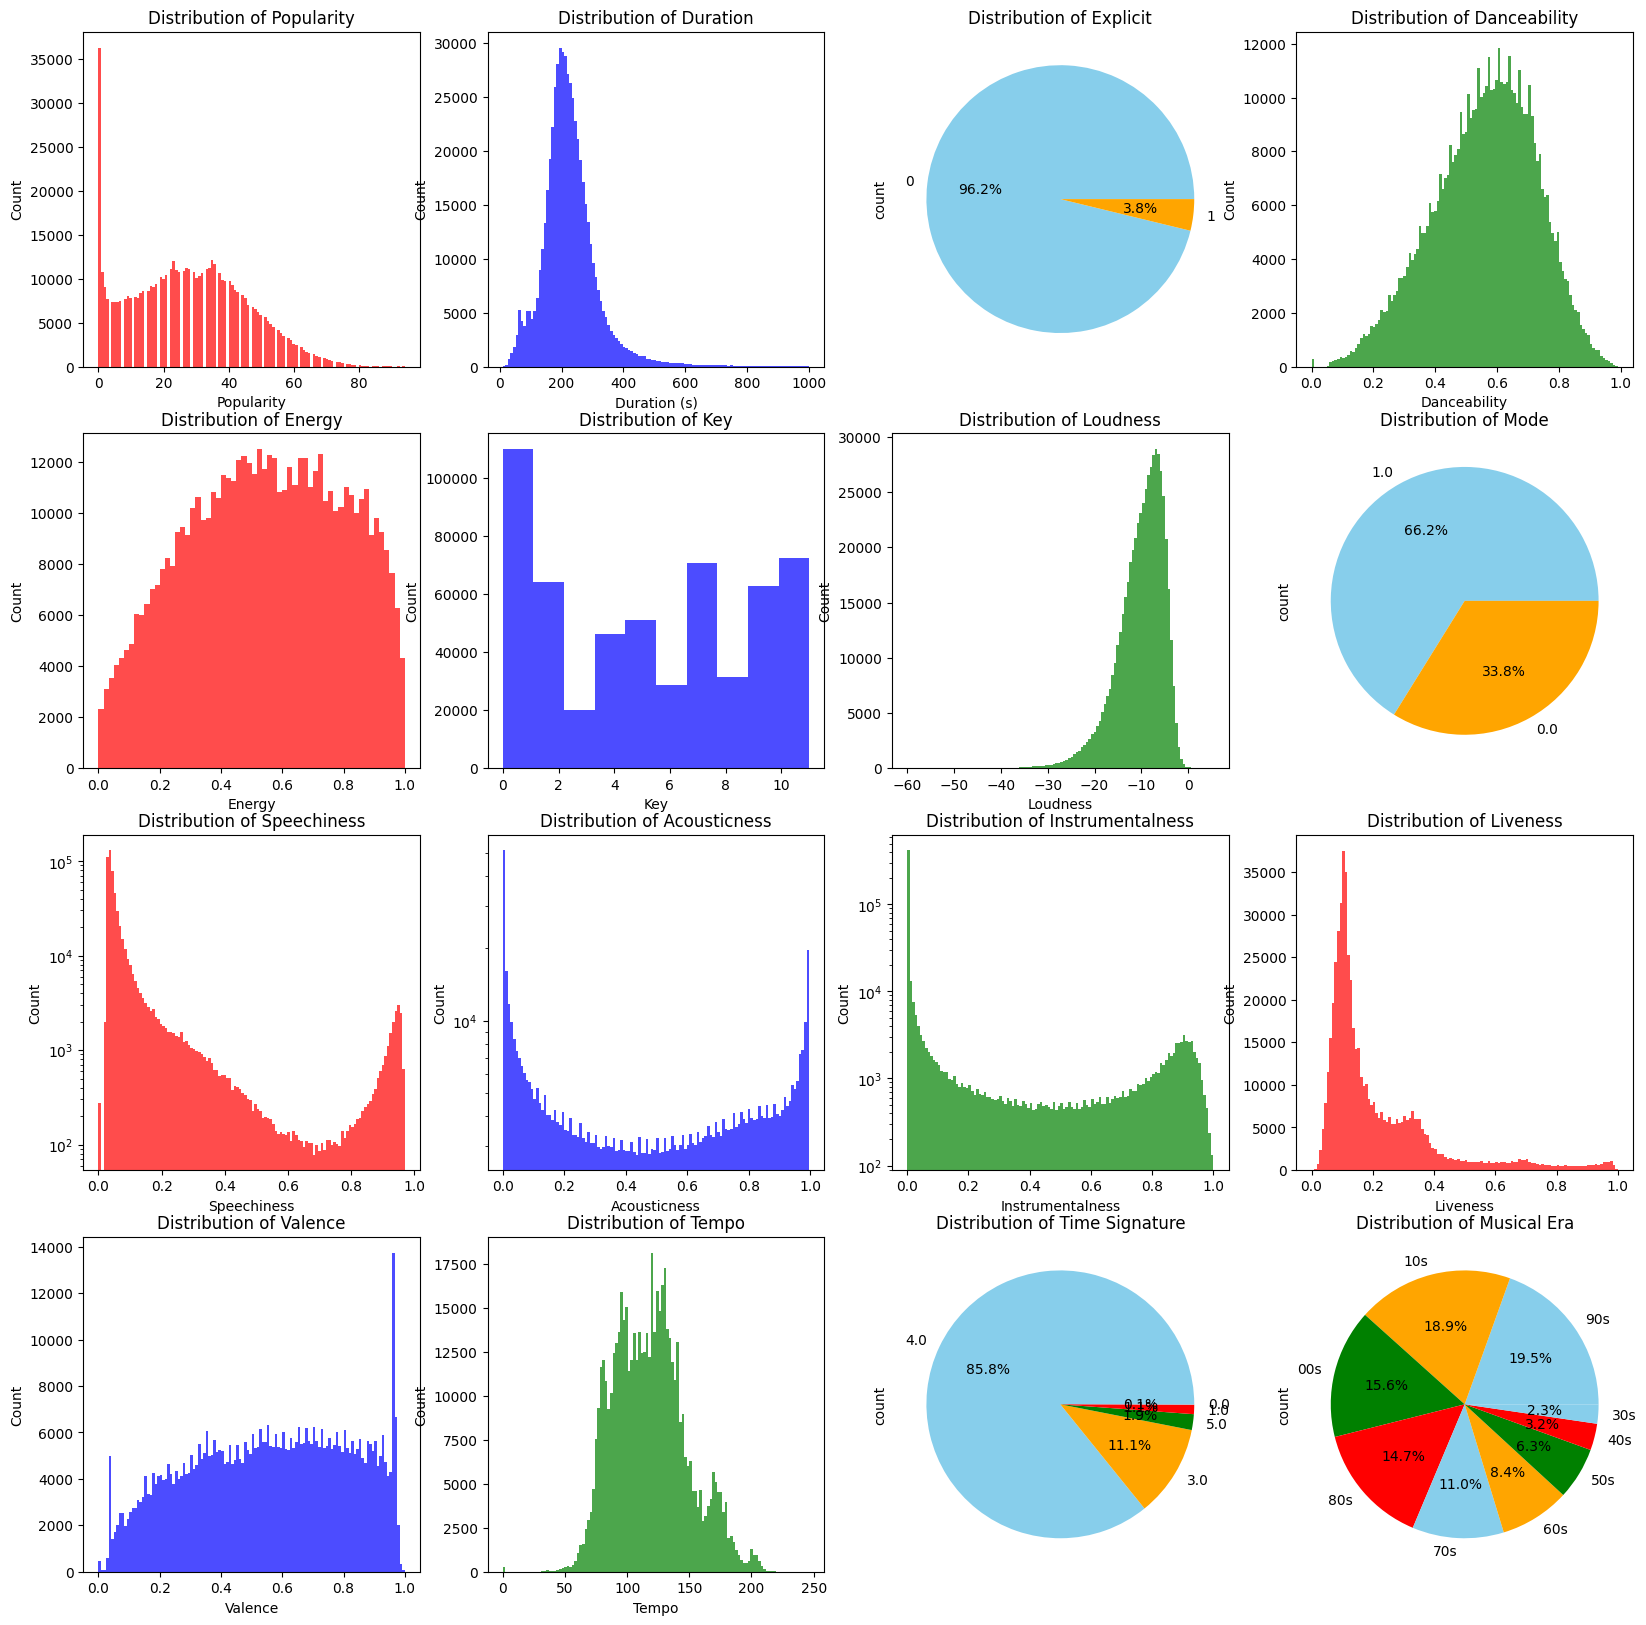

In [44]:
data_columns = [
    'popularity',
    'duration',
    'explicit',
    'danceability',
    'energy',
    'key',
    'loudness',
    'mode',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'time_signature'
    'musical_era'
]

# make a 4x4 plot
plt.figure(figsize=(20, 20))

# make a plot for popularity
plt.subplot(4, 4, 1)
plt.hist(tracks['popularity'], bins=120, color='red', alpha=0.7)
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.title('Distribution of Popularity')

# make a plot for duration_ms
plt.subplot(4, 4, 2)
plt.hist(tracks['duration_ms'], bins=120, color='blue', alpha=0.7)
plt.xlabel('Duration (s)')
plt.ylabel('Count')
plt.title('Distribution of Duration')

# make a pir chart for explicit
plt.subplot(4, 4, 3)
tracks['explicit'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Distribution of Explicit')

# make a plot for danceability
plt.subplot(4, 4, 4)
plt.hist(tracks['danceability'], bins=120, color='green', alpha=0.7)
plt.xlabel('Danceability')
plt.ylabel('Count')
plt.title('Distribution of Danceability')

# make a plot for energy
plt.subplot(4, 4, 5)
plt.hist(tracks['energy'], bins=60, color='red', alpha=0.7)
plt.xlabel('Energy')
plt.ylabel('Count')
plt.title('Distribution of Energy')

# make a plot for key
plt.subplot(4, 4, 6)
plt.hist(tracks['key'], color='blue', alpha=0.7)
plt.xlabel('Key')
plt.ylabel('Count')
plt.title('Distribution of Key')

# make a plot for loudness
plt.subplot(4, 4, 7)
plt.hist(tracks['loudness'], bins=120, color='green', alpha=0.7)
plt.xlabel('Loudness')
plt.ylabel('Count')
plt.title('Distribution of Loudness')

# make a plot for mode
plt.subplot(4, 4, 8)
tracks['mode'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Distribution of Mode')

# make a plot for speechiness (y axis should be log scale)
plt.subplot(4, 4, 9)
plt.hist(tracks['speechiness'], bins=120, color='red', alpha=0.7)
plt.xlabel('Speechiness')
plt.ylabel('Count')
plt.title('Distribution of Speechiness')
plt.yscale('log')

# make a plot for acousticness
plt.subplot(4, 4, 10)
plt.hist(tracks['acousticness'], bins=120, color='blue', alpha=0.7)
plt.xlabel('Acousticness')
plt.ylabel('Count')
plt.title('Distribution of Acousticness')
plt.yscale('log')

# make a plot for instrumentalness
plt.subplot(4, 4, 11)
plt.hist(tracks['instrumentalness'], bins=120, color='green', alpha=0.7)
plt.xlabel('Instrumentalness')
plt.ylabel('Count')
plt.title('Distribution of Instrumentalness')
plt.yscale('log')

# make a plot for liveness
plt.subplot(4, 4, 12)
plt.hist(tracks['liveness'], bins=120, color='red', alpha=0.7)
plt.xlabel('Liveness')
plt.ylabel('Count')
plt.title('Distribution of Liveness')

# make a plot for valence
plt.subplot(4, 4, 13)
plt.hist(tracks['valence'], bins=120, color='blue', alpha=0.7)
plt.xlabel('Valence')
plt.ylabel('Count')
plt.title('Distribution of Valence')

# make a plot for tempo
plt.subplot(4, 4, 14)
plt.hist(tracks['tempo'], bins=120, color='green', alpha=0.7)
plt.xlabel('Tempo')
plt.ylabel('Count')
plt.title('Distribution of Tempo')

# make a plot for time_signature
plt.subplot(4, 4, 15)
tracks['time_signature'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'orange', 'green', 'red'])
plt.title('Distribution of Time Signature')

# make a plot for musical_era
plt.subplot(4, 4, 16)
tracks['musical_era'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'orange', 'green', 'red'])
plt.title('Distribution of Musical Era')


plt.show()

In [45]:
# Acousticness: A score from 0.0 to 1.0 indicating the likelihood of the track being acoustic.
# Danceability: A value between 0.0 and 1.0 that reflects a track’s suitability for dancing.
# Instrumentalness: A value up to 1.0 predicting if a track lacks vocals.
# Duration: The length of the track in seconds.
# Energy: A 0.0 to 1.0 measure of a track’s intensity and activity level.
# Key: The pitch of the track, represented by integers where 0 = C.
# Liveness: Indicates the probability of the track being recorded live.
# Loudness: The average loudness of the track in decibels (dB).
# Mode: The modality of the track, with 1 for major and 0 for minor.
# Speechiness: Measures the presence of spoken words, with 1.0 being all speech.
# Tempo: The track’s speed in beats per minute (BPM).
# Time Signature: The notational convention indicating the number of beats per bar.
# Valence: A 0.0 to 1.0 measure of a track’s musical positiveness.

In [46]:
percent_data = [
    'popularity',
    'duration_ms',
    'danceability',
    'energy',
    'loudness',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo'
]

def find_percentiles(data, percentiles):
    return data.quantile(percentiles)
percentiles = find_percentiles(tracks[percent_data], [i/100 for i in range(0, 101, 1)])


def track_normalised_signiture(track):
    track_values = {
        'popularity': track['popularity'],
        'duration': track['duration_ms'],
        'explicit': track['explicit'],
        'danceability': track['danceability'],
        'energy': track['energy'],
        'key': track['key'],
        'loudness': track['loudness'],
        'mode': track['mode'],
        'speechiness': track['speechiness'],
        'acousticness': track['acousticness'],
        'instrumentalness': track['instrumentalness'],
        'liveness': track['liveness'],
        'valence': track['valence'],
        'tempo': track['tempo'],
        'time_signature': track['time_signature'],
        'musical_era': track['musical_era'],

        'track_id': track['id'],
        'track_name': track['name'].lower(),
        'artist_name': track['artists'],
    }

    for key in track_values:
        if key in percent_data:
            track_values[key] = (track_values[key] - percentiles[key][0]) / (percentiles[key][1] - percentiles[key][0])

    track_values['key'] = track_values['key'] / 11
    track_values['time_signature'] = track_values['time_signature'] / 5

    musical_era_dict = {
        '30s': 0.0,
        '40s': 0.1,
        '50s': 0.2,
        '60s': 0.3,
        '70s': 0.4,
        '80s': 0.5,
        '90s': 0.6,
        '00s': 0.7,
        '10s': 0.8,
        '20s': 0.9
    }

    track_values['musical_era'] = musical_era_dict[track_values['musical_era']]

    return track_values

normalized_track_example = track_normalised_signiture(tracks.iloc[0])
norm_table_columns = list(normalized_track_example.keys())

print(norm_table_columns)
print(normalized_track_example)



['popularity', 'duration', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'musical_era', 'track_id', 'track_name', 'artist_name']
{'popularity': 0.5106382978723404, 'duration': 541.6, 'explicit': 0, 'danceability': 0.3521695257315842, 'energy': 0.326, 'key': 0.09090909090909091, 'loudness': 0.6830182329906999, 'mode': 1.0, 'speechiness': 0.056745623069001036, 'acousticness': 0.9909638554216867, 'instrumentalness': 0.886, 'liveness': 0.784, 'valence': 0.168, 'tempo': 0.32564605225240584, 'time_signature': 0.8, 'musical_era': 0.0, 'track_id': '7CIoJE0JfVFcmmUY3fFojH', 'track_name': 'Hungarian Rhapsody No. 2 in C-Sharp Minor, S. 244/2', 'artist_name': "['Franz Liszt', 'Vladimir Horowitz']"}


In [47]:
norm_data = []
for i in range(tracks.shape[0]):
    norm_data.append(track_normalised_signiture(tracks.iloc[i]))

norm_df = pd.DataFrame(norm_data)
norm_df.head()

,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,musical_era,track_id,track_name,artist_name
0,0.510638,541.600,0,0.352170,0.32600,0.090909,0.683018,1.0,0.056746,0.990964,0.886000,0.7840,0.1680,0.325646,0.8,0.0,7CIoJE0JfVFcmmUY3fFojH,"Hungarian Rhapsody No. 2 in C-Sharp Minor, S. ...","['Franz Liszt', 'Vladimir Horowitz']"
1,0.404255,124.147,0,0.705348,0.44700,0.272727,0.755797,1.0,0.164779,0.974900,0.000236,0.1900,0.6030,0.505165,0.6,0.0,1URyyv3KRVnqlVkQQi3OlQ,Chorra,['Carlos Gardel']
2,0.393617,264.560,0,0.271443,0.00856,0.090909,0.463687,1.0,0.037796,0.994980,0.913000,0.1320,0.0808,0.284645,0.8,0.0,66QFC1l8Oe1bKSLdZYwr9B,"Consolation No. 3 in D-Flat Major, S. 172/3","['Franz Liszt', 'Vladimir Horowitz']"
3,0.329787,148.219,0,0.706357,0.59300,0.545455,0.828484,1.0,0.186406,0.986948,0.000083,0.3790,0.7500,0.435874,0.8,0.0,5RXchQNEfOrsAtfklgYNnR,Fita Amarela,"['Francisco Alves', 'Mario Reis']"
4,0.319149,210.827,0,0.296670,0.00684,0.363636,0.469591,1.0,0.048404,0.996988,0.939000,0.0616,0.0550,0.202094,0.8,0.0,1EwvP4mPzurPA5axgvUoM6,"Consolation No. 2 in E Major, S. 172/2","['Franz Liszt', 'Vladimir Horowitz']"


In [50]:
# save the norm_data to data/normalized_tracks.csv
norm_df.to_csv('data/normalized_tracks.csv', index=False)


In [48]:
def cosine_similarity(track1, track2):
    norm_table_columns = track1.keys()
    norm_table_columns = [key for key in norm_table_columns if key not in ['track_id', 'track_name', 'artist_name']]

    track1_values = [track1[key] for key in norm_table_columns]
    track2_values = [track2[key] for key in norm_table_columns]

    dot_product = np.dot(track1_values, track2_values)
    norm_track1 = np.linalg.norm(track1_values)
    norm_track2 = np.linalg.norm(track2_values)

    return dot_product / (norm_track1 * norm_track2)

In [52]:
songs_to_find  = [
    'A String of Pearls'.lower(),
    'Can\'t Help Falling in Love'.lower(),
    'I want to hold your hand'.lower(),
    'respect'.lower(),
    'like a prayer'.lower(),
    'rapper\'s delight'.lower(),
    'fight the power'.lower(),
    'ice ice baby'.lower(),
    'california love'.lower(),
    'johnny b. goode'.lower(),
    'like a rolling stone'.lower(),
    'whole lot of rosie'.lower(),
    'november rain'.lower(),
    'over the rainbow'.lower(),
    'bohemian rhapsody'.lower(),    
]

# find the track_id and artist_name of the songs in songs_to_find
songs = {}
for song in songs_to_find:
    for i in range(tracks.shape[0]):
        if song in tracks.iloc[i]['name'].lower():
            songs[song] = {
                'track_id': tracks.iloc[i]['id'],
                'artist_name': tracks.iloc[i]['artists'],
                'title': tracks.iloc[i]['name']
            }
            break

songs

{'a string of pearls': {'track_id': '4Q5cK2G0oSTO8Col01lB54',
  'artist_name': "['Glenn Miller']",
  'title': 'A String of Pearls'},
 "can't help falling in love": {'track_id': '44AyOl4qVkzS48vBsbNXaC',
  'artist_name': "['Elvis Presley']",
  'title': "Can't Help Falling in Love"},
 'i want to hold your hand': {'track_id': '5Qe7NHxeLAn8KoLTNLSdwe',
  'artist_name': "['The Beatles']",
  'title': 'I Want To Hold Your Hand - Remastered 2009'},
 'respect': {'track_id': '5e3isD5st7PGYzSJuoRSIV',
  'artist_name': "['The Kinks']",
  'title': 'A Well Respected Man'},
 'like a prayer': {'track_id': '2v7ywbUzCgcVohHaKUcacV',
  'artist_name': "['Madonna']",
  'title': 'Like a Prayer'},
 "rapper's delight": {'track_id': '7hqpYgtDckN5wX0jxaaAPx',
  'artist_name': "['The Sugarhill Gang']",
  'title': "Rapper's Delight - Long Version"},
 'fight the power': {'track_id': '5idtcCtrCgNywqssGXGXTU',
  'artist_name': "['The Isley Brothers']",
  'title': 'Fight the Power, Pts. 1 & 2'},
 'ice ice baby': {'tr

{'a string of pearls': {'track_id': '4Q5cK2G0oSTO8Col01lB54',
  'artist_name': "['Glenn Miller']",
  'title': 'A String of Pearls'},
 "can't help falling in love": {'track_id': '44AyOl4qVkzS48vBsbNXaC',
  'artist_name': "['Elvis Presley']",
  'title': "Can't Help Falling in Love"},
 'i want to hold your hand': {'track_id': '5Qe7NHxeLAn8KoLTNLSdwe',
  'artist_name': "['The Beatles']",
  'title': 'I Want To Hold Your Hand - Remastered 2009'},
 'respect': {'track_id': '5e3isD5st7PGYzSJuoRSIV',
  'artist_name': "['The Kinks']",
  'title': 'A Well Respected Man'},
 'like a prayer': {'track_id': '2v7ywbUzCgcVohHaKUcacV',
  'artist_name': "['Madonna']",
  'title': 'Like a Prayer'},
 "rapper's delight": {'track_id': '7hqpYgtDckN5wX0jxaaAPx',
  'artist_name': "['The Sugarhill Gang']",
  'title': "Rapper's Delight - Long Version"},
 'fight the power': {'track_id': '5idtcCtrCgNywqssGXGXTU',
  'artist_name': "['The Isley Brothers']",
  'title': 'Fight the Power, Pts. 1 & 2'},
 'ice ice baby': {'track_id': '11d9oUiwHuYt216EFA2tiz',
  'artist_name': "['Vanilla Ice']",
  'title': 'Ice Ice Baby'},
 'california love': {'track_id': '2Low9dwyJeUtqlpgVbFFMn',
  'artist_name': "['2Pac', 'Roger', 'Dr. Dre']",
  'title': 'California Love (remix) (ft. Dr. Dre, Roger Troutman)'},
 'johnny b. goode': {'track_id': '2QfiRTz5Yc8DdShCxG1tB2',
  'artist_name': "['Chuck Berry']",
  'title': 'Johnny B. Goode'},
 'like a rolling stone': {'track_id': '3AhXZa8sUQht0UEdBJgpGc',
  'artist_name': "['Bob Dylan']",
  'title': 'Like a Rolling Stone'},
 'november rain': {'track_id': '3YRCqOhFifThpSRFJ1VWFM',
  'artist_name': '["Guns N\' Roses"]',
  'title': 'November Rain'},
 'over the rainbow': {'track_id': '1aqjIHADlHdZIwSQorUqjo',
  'artist_name': "['Sierra Nelson', 'Ricardo Alvarez']",
  'title': 'Somewhere Over the Rainbow'},
 'bohemian rhapsody': {'track_id': '4u7EnebtmKWzUH433cf5Qv',
  'artist_name': "['Queen']",
  'title': 'Bohemian Rhapsody - Remastered 2011'}}

In [53]:
# for each song in songs, find the top 5 soungs that are most similar to it
for key in songs:
    song = songs[key]
    song_title = song['title']
    song_id = song['track_id']
    song_artist = song['artist_name']

    song_index = tracks[tracks['id'] == song_id].index[0]
    song_values = track_normalised_signiture(tracks.iloc[song_index])

    similarities = []
    for i in range(tracks.shape[0]):
        track_values = track_normalised_signiture(tracks.iloc[i])
        similarity = cosine_similarity(song_values, track_values)
        similarities.append((similarity, i))

    similarities.sort(reverse=True)
    top_5 = similarities[0:6]

    print(f"Top 5 songs similar to {song_title} by {song_artist}")
    for i in range(1, 6):
        track = tracks.iloc[top_5[i][1]]
        print(f"{i}. {track['name']} by {track['artists']} with similarity {top_5[i][0]}")
    print("\n\n")

# Path: data/normalized_tracks.csv


Top 5 songs similar to A String of Pearls by ['Glenn Miller']
1. Little Italy by ['Stephen Bishop'] with similarity 0.9999993542087608
2. Nunca Más by ['Camilo Sesto'] with similarity 0.9999988245128374
3. Expecting by ['Minnie Riperton'] with similarity 0.9999988193492092
4. La Mentira by ['Luis Miguel'] with similarity 0.9999987195174853
5. Fallin' Rain by ['Link Wray'] with similarity 0.999998698697377



Top 5 songs similar to Can't Help Falling in Love by ['Elvis Presley']
1. All Those Years of Learning by ['INXS'] with similarity 0.9999987861534229
2. Okaeri (2019 New Mix) by ['Keiichi Sokabe'] with similarity 0.9999985878008475
3. おかえり (2019 New Mix) by ['Keiichi Sokabe'] with similarity 0.9999984733777026
4. The Cold Hard Facts of Life by ['Bill Anderson'] with similarity 0.99999816898047
5. Termesa by ['Camboy Estevez'] with similarity 0.9999981073821653



Top 5 songs similar to I Want To Hold Your Hand - Remastered 2009 by ['The Beatles']
1. Dixie Lullaby by ['Leon Russell']

KeyboardInterrupt: 

In [ ]:
'''
Top 5 songs similar to A String of Pearls by ['Glenn Miller']
1. Little Italy by ['Stephen Bishop'] with similarity 0.9999993542087608
2. Nunca Más by ['Camilo Sesto'] with similarity 0.9999988245128374
3. Expecting by ['Minnie Riperton'] with similarity 0.9999988193492092
4. La Mentira by ['Luis Miguel'] with similarity 0.9999987195174853
5. Fallin' Rain by ['Link Wray'] with similarity 0.999998698697377



Top 5 songs similar to Can't Help Falling in Love by ['Elvis Presley']
1. All Those Years of Learning by ['INXS'] with similarity 0.9999987861534229
2. Okaeri (2019 New Mix) by ['Keiichi Sokabe'] with similarity 0.9999985878008475
3. おかえり (2019 New Mix) by ['Keiichi Sokabe'] with similarity 0.9999984733777026
4. The Cold Hard Facts of Life by ['Bill Anderson'] with similarity 0.99999816898047
5. Termesa by ['Camboy Estevez'] with similarity 0.9999981073821653



Top 5 songs similar to I Want To Hold Your Hand - Remastered 2009 by ['The Beatles']
1. Dixie Lullaby by ['Leon Russell'] with similarity 0.9999992619273665
2. (I Know) I'm Losing You by ['Gladys Knight & The Pips'] with similarity 0.9999991947088172
3. Roses in the Snow - 2002 Remaster by ['Emmylou Harris'] with similarity 0.9999990073136449
4. Parker's Band by ['Steely Dan'] with similarity 0.9999988573700108
5. Eg e så forelska by ['Mods'] with similarity 0.9999987712132872



Top 5 songs similar to A Well Respected Man by ['The Kinks']
1. Attics of My Life - 2013 Remaster by ['Grateful Dead'] with similarity 0.9999999428095113
2. Happier Than The Morning Sun by ['Stevie Wonder'] with similarity 0.9999997448498996
3. I LOVE YOU by ['Off Course'] with similarity 0.9999997392132842
4. Happier Than The Morning Sun by ['Stevie Wonder'] with similarity 0.9999997308159728
5. God Is the Strength of My Life by ['J. Daniel Smith', "Integrity's Hosanna! Music"] with similarity 0.9999997004829319



Top 5 songs similar to Like a Prayer by ['Madonna']
1. Mi Primer Amor by ['Liberación'] with similarity 0.999999513972387
2. Dig for Fire by ['Pixies'] with similarity 0.999999470057059
3. I Been to Georgia on a Fast Train by ['Billy Joe Shaver'] with similarity 0.9999994374156901
4. You Set My Heart On Fire - Part 1 by ['Tina Charles'] with similarity 0.9999993638213929
5. The Mighty Quinn - Mono Version by ['Manfred Mann'] with similarity 0.9999993494547104



Top 5 songs similar to Rapper's Delight - Long Version by ['The Sugarhill Gang']
1. El Satánico Dr. Cadillac - Remasterizado 2008 by ['Los Fabulosos Cadillacs'] with similarity 0.9999997615358431
2. Promises, Promises - US Single Version / 2018 Remaster by ['Naked Eyes'] with similarity 0.9999997612788318
3. Manuel by ['Ed Motta'] with similarity 0.999999657353789
4. Candy by ['Mandy Moore'] with similarity 0.99999962790514
5. Fiesta En América by ['Chayanne'] with similarity 0.9999996090018276



Top 5 songs similar to Fight the Power, Pts. 1 & 2 by ['The Isley Brothers']
1. Too Hot To Stop (Pt. 1) by ['The Bar-Kays'] with similarity 0.9999998283629911
2. Reggaemylitis by ['Peter Tosh'] with similarity 0.99999981434676
3. Take Me to the Top by ['Advance', 'A. Pignagnoli', 'D. Raimondi', 'I. Spagna', 'L.WESLEY', 'V. Patterson'] with similarity 0.9999997953545916
4. Fantastic Voyage by ['Lakeside'] with similarity 0.999999792693392
5. Andrea - Live by ['Fabrizio De André'] with similarity 0.9999997837561687



Top 5 songs similar to Ice Ice Baby by ['Vanilla Ice']
1. Adiós papá by ['Los Ronaldos'] with similarity 0.9999997634905368
2. People Are People - 2006 Remaster by ['Depeche Mode'] with similarity 0.9999997608331364
3. Senza giacca e cravatta by ["Nino D'Angelo"] with similarity 0.9999997474165311
4. A Hegyekbe Fönn by ['Hip Hop Boyz'] with similarity 0.9999997226117208
5. If I Only Knew by ['Tom Jones'] with similarity 0.9999997174503373
'''

In [78]:
norm_df = pd.read_csv('data/normalized_tracks.csv')
print(norm_df.head())

songs_to_find = [
    'yesterday - remastered 2009',
    'hey jude - remastered 2009',

    'hypnotize - 2014 remaster',
]

# find the track_id and artist_name of the songs in songs_to_find
songs = {}
for song in songs_to_find:
    for i in range(norm_df.shape[0]):
        if song == norm_df.iloc[i]['track_name'].lower():
            print(norm_df.iloc[i])
            songs[song] = {
                'track_id': norm_df.iloc[i]['track_id'],
                'artist_name': norm_df.iloc[i]['artist_name'],
                'title': norm_df.iloc[i]['track_name']
            }
            break
songs

   popularity  duration  explicit  danceability   energy       key  loudness  \
0    0.510638   541.600         0      0.352170  0.32600  0.090909  0.683018   
1    0.404255   124.147         0      0.705348  0.44700  0.272727  0.755797   
2    0.393617   264.560         0      0.271443  0.00856  0.090909  0.463687   
3    0.329787   148.219         0      0.706357  0.59300  0.545455  0.828484   
4    0.319149   210.827         0      0.296670  0.00684  0.363636  0.469591   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0   1.0     0.056746      0.990964          0.886000    0.7840   0.1680   
1   1.0     0.164779      0.974900          0.000236    0.1900   0.6030   
2   1.0     0.037796      0.994980          0.913000    0.1320   0.0808   
3   1.0     0.186406      0.986948          0.000083    0.3790   0.7500   
4   1.0     0.048404      0.996988          0.939000    0.0616   0.0550   

      tempo  time_signature  musical_era                track_id  \


{'yesterday - remastered 2009': {'track_id': '3BQHpFgAp4l80e1XslIjNI',
  'artist_name': "['The Beatles']",
  'title': 'Yesterday - Remastered 2009'},
 'hey jude - remastered 2009': {'track_id': '3m7V717IKZqZLW5qUIOxdD',
  'artist_name': "['The Beatles']",
  'title': 'Hey Jude - Remastered 2009'},
 'hypnotize - 2014 remaster': {'track_id': '7KwZNVEaqikRSBSpyhXK2j',
  'artist_name': "['The Notorious B.I.G.']",
  'title': 'Hypnotize - 2014 Remaster'}}

In [80]:
yesterday = songs['yesterday - remastered 2009']
yesterday

{'track_id': '3BQHpFgAp4l80e1XslIjNI',
 'artist_name': "['The Beatles']",
 'title': 'Yesterday - Remastered 2009'}

In [81]:
yesterday_values = norm_df[norm_df['track_id'] == yesterday['track_id']].iloc[0]
yesterday_values

popularity                             0.819149
duration                                125.667
explicit                                      0
danceability                           0.335015
energy                                    0.179
key                                    0.454545
loudness                               0.736815
mode                                        1.0
speechiness                            0.033574
acousticness                            0.88253
instrumentalness                            0.0
liveness                                 0.0886
valence                                   0.315
tempo                                  0.391788
time_signature                              0.8
musical_era                                 0.3
track_id                 3BQHpFgAp4l80e1XslIjNI
track_name          Yesterday - Remastered 2009
artist_name                     ['The Beatles']
Name: 32814, dtype: object

In [82]:
heyjude = songs['hey jude - remastered 2009']
heyjude_values = norm_df[norm_df['track_id'] == heyjude['track_id']].iloc[0]
heyjude_values

popularity                            0.712766
duration                               431.333
explicit                                     0
danceability                          0.405651
energy                                   0.552
key                                   0.909091
loudness                               0.76239
mode                                       1.0
speechiness                           0.026571
acousticness                          0.028112
instrumentalness                      0.000014
liveness                                0.0929
valence                                  0.668
tempo                                 0.589185
time_signature                             0.8
musical_era                                0.4
track_id                3m7V717IKZqZLW5qUIOxdD
track_name          Hey Jude - Remastered 2009
artist_name                    ['The Beatles']
Name: 40768, dtype: object

In [83]:
hypnotize = songs['hypnotize - 2014 remaster']
hypnotize_values = norm_df[norm_df['track_id'] == hypnotize['track_id']].iloc[0]
hypnotize_values

popularity                           0.840426
duration                              229.827
explicit                                    1
danceability                         0.909183
energy                                  0.697
key                                  0.818182
loudness                             0.865165
mode                                      1.0
speechiness                          0.288363
acousticness                         0.145582
instrumentalness                          0.0
liveness                                0.287
valence                                  0.67
tempo                                0.381283
time_signature                            0.8
musical_era                               0.6
track_id               7KwZNVEaqikRSBSpyhXK2j
track_name          Hypnotize - 2014 Remaster
artist_name          ['The Notorious B.I.G.']
Name: 64658, dtype: object

In [89]:
def cs(v1, v2):
    v1_v = v1[:-3]
    v2_v = v2[:-3]
    dot_product = np.dot(v1_v, v2_v)
    norm_v1 = np.linalg.norm(v1_v)
    norm_v2 = np.linalg.norm(v2_v)
    return dot_product / (norm_v1 * norm_v2)


In [91]:
def ed(v1, v2):
    v1_v = v1[:-3]
    v2_v = v2[:-3]
    return np.linalg.norm(v1_v - v2_v)

In [93]:
print(cs(yesterday_values, hypnotize_values))
print(ed(yesterday_values, hypnotize_values))

print("\n")

print(cs(heyjude_values, yesterday_values))
print(ed(heyjude_values, yesterday_values))

0.9999492380134765
104.17253120388416


0.9999236751340863
305.6680714914039
